In [16]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as numpy
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 
from sklearn.ensemble import RandomForestRegressor
import joblib

In [3]:
# Load dataset
df = pd.read_csv("E:\Project_6_Sales Forecasting Across Multiple Retail Store\df_train_for_deeplearning.csv")

In [4]:
# check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1017209 non-null  object 
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  float64
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  float64
 10  Assortment                 1017209 non-null  float64
 11  CompetitionDistance        1017209 non-null  int64  
 12  CompetitionOpenSinceMonth  1017209 non-null  int64  
 13  CompetitionO

In [5]:
# Check columns in dataset
df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'Weekday',
       'IsWeekend', 'IsBeginningOfMonth', 'IsMidMonth', 'IsEndOfMonth',
       'Quarter', 'IsHolidaySeason', 'PromoIntervalMonths', 'PromoRunningDays',
       'CompetitionDurationMonths'],
      dtype='object')

In [6]:
# Rename some colums as per task
df = df.rename(columns={'StateHoliday':'IsHoliday','Promo':'IsPromo','Store':'Store-ID'})

In [7]:
# Make final dataframe with columns depend on dates
final_df = df[['Store-ID','IsHoliday','IsWeekend','IsPromo','Customers','Open','Day','Weekday','Month','Year','Sales']]

In [8]:
# check final data
final_df.head(4)

,Store-ID,IsHoliday,IsWeekend,IsPromo,Customers,Open,Day,Weekday,Month,Year,Sales
0,1,0.0,0.0,1,555,1,31,4,7,2015,5263
1,2,0.0,0.0,1,625,1,31,4,7,2015,6064
2,3,0.0,0.0,1,821,1,31,4,7,2015,8314
3,4,0.0,0.0,1,1485,1,31,4,7,2015,13995


In [9]:
# save final data for making dashboard
final_df.to_csv('final_df_dashboard.csv',index=False)

In [10]:
# Make model for prdiction using Random forest 
dataset = pd.read_csv('final_df_dashboard.csv')
X = dataset.drop('Sales', axis=1)
y = dataset['Sales']

model = RandomForestRegressor(n_estimators=50,max_depth=20)
model.fit(X, y)

joblib.dump(model, 'my_model.pkl',compress=3)

#Load the model
model_rfr = joblib.load('my_model.pkl')

data_input = [[1,0,0,1,555,1,31,4,7,2015]]

def prediction(data_input):
    prediction = model.predict(data_input)
    return prediction

prediction_data = prediction(data_input)
print("Predicted Sales:", prediction_data)

Predicted Sales: [5196.37143791]


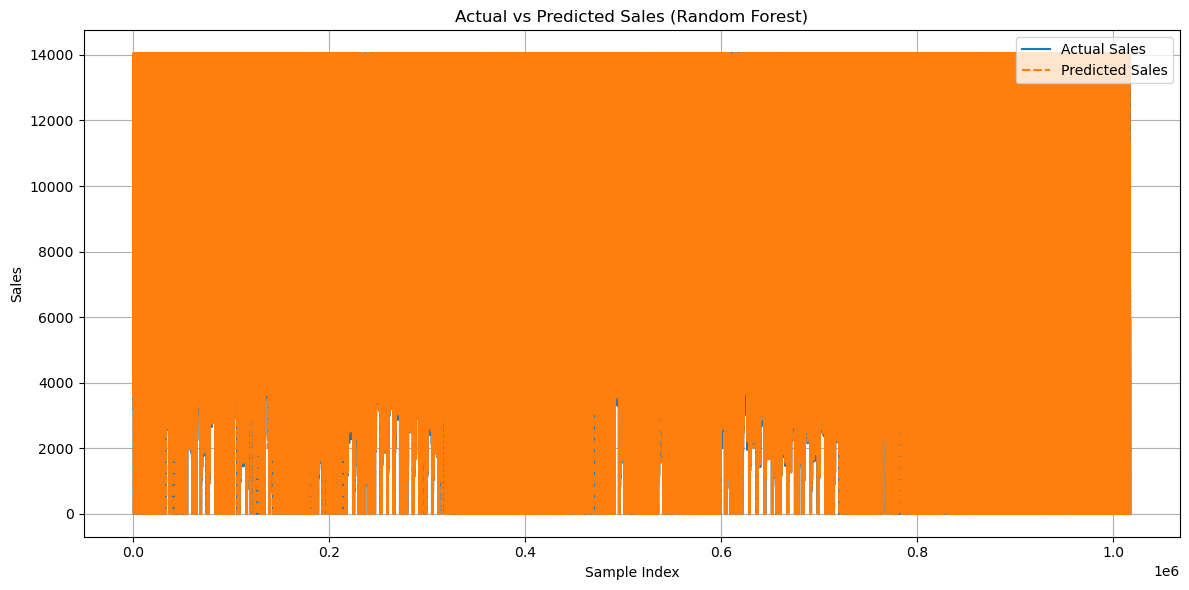

In [17]:
dataset = pd.read_csv('final_df_dashboard.csv')
model = joblib.load('my_model.pkl')

X = dataset.drop('Sales', axis=1)
y = dataset['Sales']

y_pred = model.predict(X)

result_df = X.copy()
result_df['Actual Sales'] = y
result_df['Predicted Sales'] = y_pred

plt.figure(figsize=(12,6))
sns.lineplot(data=result_df[['Actual Sales', 'Predicted Sales']])
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()